Dear Groupmates,

This is the Jupyter Notebook file where we will be doing all of our Python-related work. Mainly we will be doing Well-Log data analysis and interpretations here. I will urge everyone to use this sharing platforms for our work so that everyone has access to it all the time. Thank you.

Regards,\
Nandan

# Install Necessary Modules

In [ ]:
!pip install lasio

# Import Necessary Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio

## Well: F02-1

In [ ]:
las_1 = lasio.read("F02-1_logs.las")

In [ ]:
las_1.well

[HeaderItem(mnemonic="STRT", unit="M", value="48.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="1500.0", descr="END DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
 HeaderItem(mnemonic="WELL", unit="", value="F02-1", descr="WELL NAME"),
 HeaderItem(mnemonic="EKB", unit="M", value="30.0", descr="KELLY BUSHING ELEVAT"),
 HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
 HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
 HeaderItem(mnemonic="LOC", unit="", value="X = 606554.0000 Y = 6080126.0000", "),
 HeaderItem(mnemonic="PROV:1", unit="", value="", descr=""),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr=""),
 HeaderItem(mnemonic="PROV:2", unit="", value="", des

In [ ]:
las_1.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="1     DEPTH", original_mnemonic="DEPTH", data.shape=(9680,)),
 CurveItem(mnemonic="RHOB", unit="kg/m3", value="", descr="2     Density", original_mnemonic="RHOB", data.shape=(9680,)),
 CurveItem(mnemonic="DT", unit="us/m", value="", descr="3     Sonic", original_mnemonic="DT", data.shape=(9680,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="4     Gamma Ray", original_mnemonic="GR", data.shape=(9680,)),
 CurveItem(mnemonic="AI", unit="m/s)*(kg/m3", value="", descr="5     P-Impedance", original_mnemonic="AI", data.shape=(9680,)),
 CurveItem(mnemonic="AI_REL", unit="m/s)*(kg/m3", value="", descr="6     P-Impedance_rel", original_mnemonic="AI_REL", data.shape=(9680,)),
 CurveItem(mnemonic="PHIE", unit="fraction", value="", descr="7     Porosity", original_mnemonic="PHIE", data.shape=(9680,))]

In [ ]:
df_1 = las_1.df() # converting to dataframe

In [ ]:
df_1

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN


In [ ]:
df_1.isna().sum() # check the number of nan values

RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
dtype: int64

In [ ]:
df_1.reset_index(inplace=True)
df_1.rename(columns={'DEPTH':'DEPTH'},inplace=True)

In [ ]:
df_1

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN


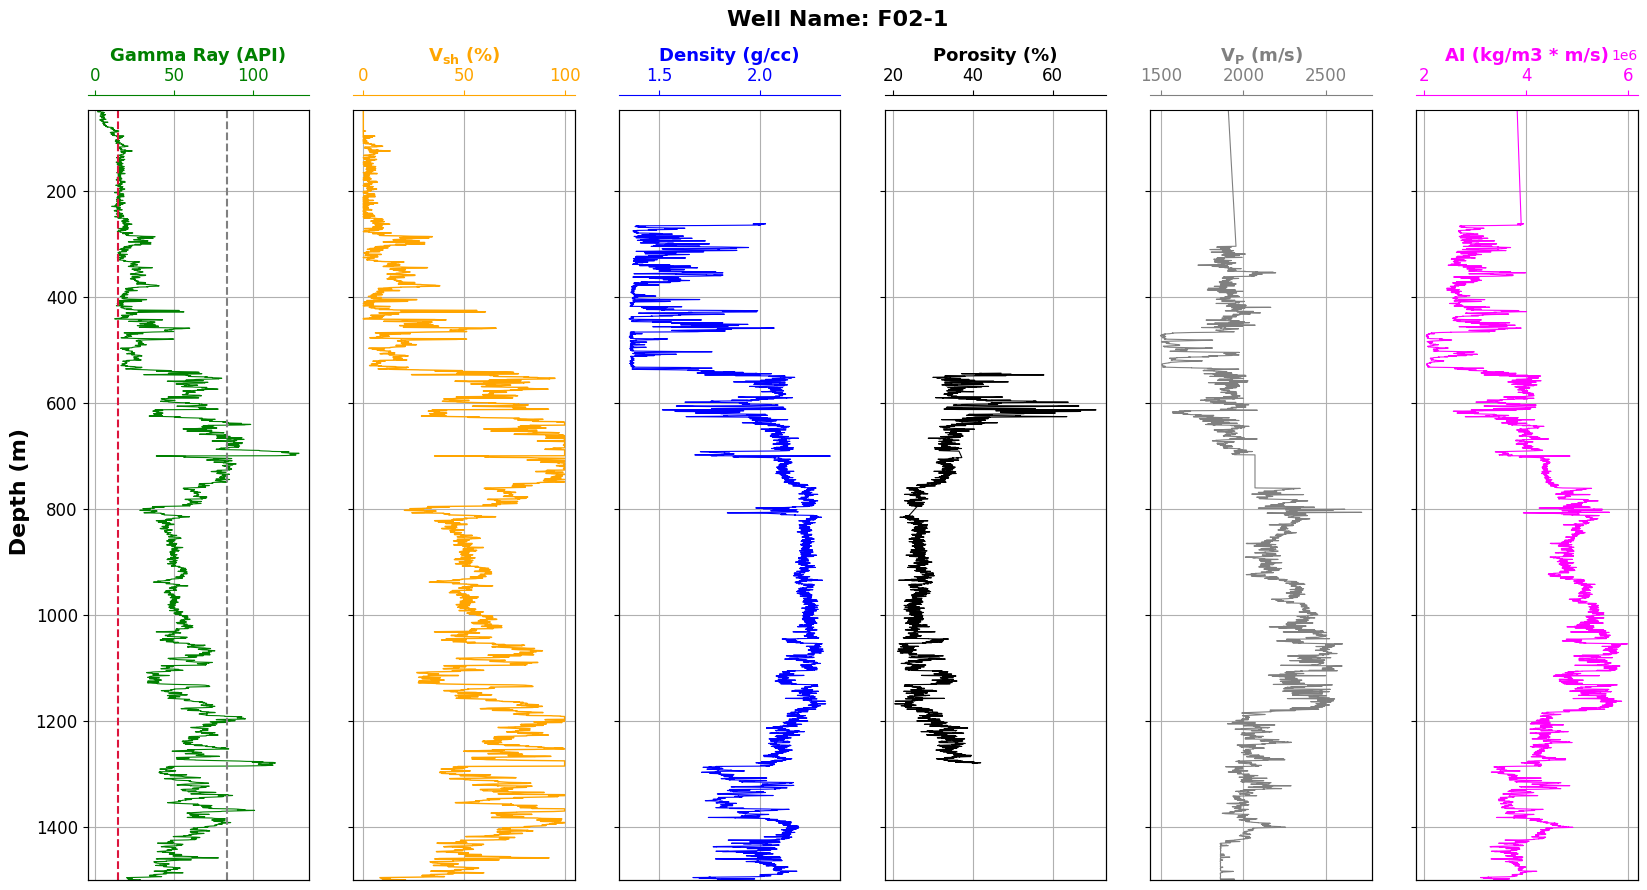

In [ ]:
# volume of shale calculation for raw data
p5_1 = df_1['GR'].quantile(0.05)
p95_1 = df_1['GR'].quantile(0.95)
I_GR_1 = np.array((df_1["GR"] - p5_1) / (p95_1 - p5_1))
V_sh_1 = np.clip(np.array(I_GR_1), 0, 1)

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F02-1", fontsize = 16, fontweight = 'bold')

# gamma ray log
ax[0].plot(df_1.GR, df_1.DEPTH, color = 'green', linewidth = 0.8)
ax[0].axvline(p5_1, color = "crimson", linestyle = '--')
ax[0].axvline(p95_1, color = "gray", linestyle = '--')
# ax[0].set_xlim(0, 150)
# ax[0].set_xticks([0, 150])
ax[0].set_xlabel('Gamma Ray (API)', color = 'green', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'green')
ax[0].spines.top.set_edgecolor('green')

# volume of shale log
ax[1].plot(V_sh_1 * 100, df_1.DEPTH, color = "orange", linewidth = 1)
ax[1].set_xlabel('$\mathbf{V_{sh}}$ (%)', color = "orange", weight = 'bold', size = 13)
# ax[1].set_xlim(0, 100)
# ax[1].set_xticks([0, 100])
ax[1].tick_params(axis = 'x', colors = "orange")
ax[1].spines.top.set_edgecolor("orange")

# density log
ax[2].plot(df_1.RHOB * 10 ** (-3), df_1.DEPTH, color = 'blue', linewidth = 0.8)
# ax[2].set_xlim(1.95, 3)
# ax[2].set_xticks([1.95, 2.5, 2.95])
ax[2].set_xlabel('Density (g/cc)', color = 'blue', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'blue')
ax[2].spines.top.set_edgecolor('blue')

# porosity log
ax[3].plot(df_1.PHIE * 100, df_1.DEPTH, color = "black", linewidth = 0.8)
# ax[3].set_xlim(-25, 50)
# ax[3].set_xticks([0, 100])
ax[3].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = "black")
ax[3].spines.top.set_edgecolor("black")

# sonic log
ax[4].plot(10 ** 6 / df_1.DT, df_1.DEPTH, color = 'grey', linewidth = 0.8)
# ax[4].set_xlim(1500, 4000)
# ax[4].set_xticks([1500, 4000, 6000])
ax[4].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'grey')
ax[4].spines.top.set_edgecolor('grey')

# AI log
ax[5].plot(df_1.AI, df_1.DEPTH, color = 'magenta', linewidth = 0.8)
# ax[5].set_xlim(1500, 4000)
# ax[5].set_xticks([1500, 4000, 6000])
ax[5].set_xlabel("AI (kg/m3 * m/s)", color = 'magenta', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'magenta')
ax[5].spines.top.set_edgecolor('magenta')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_1.DEPTH.max(), df_1.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

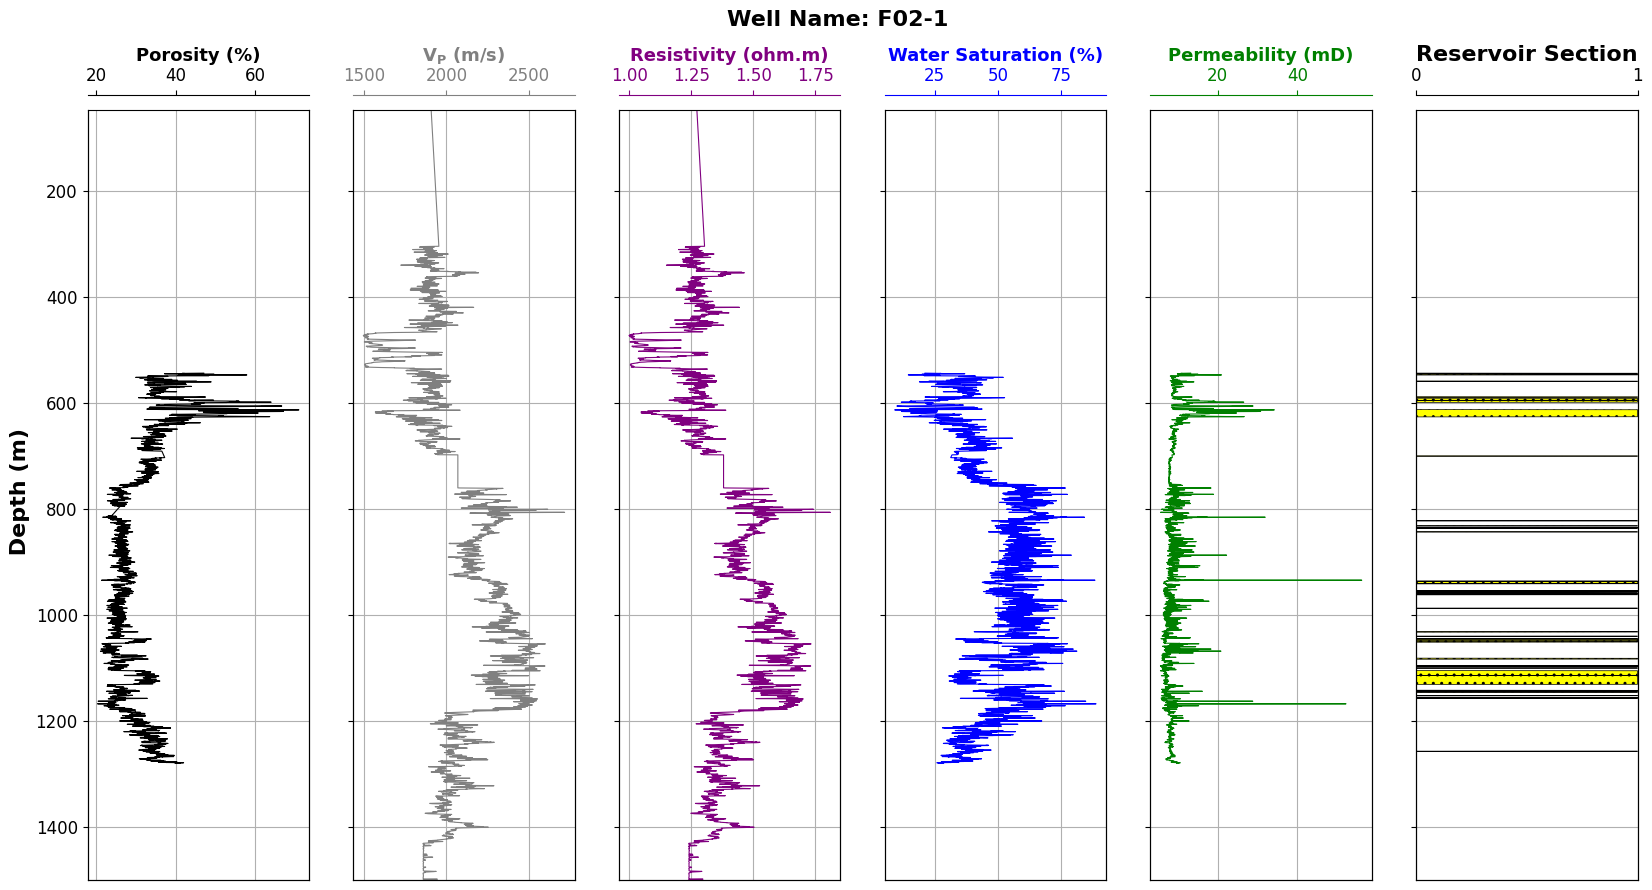

In [ ]:
# resistivity log generation using faust equation
RES_1 = (1 / (0.3048 * df_1.DEPTH.max())) * (0.3048 * 10 ** 6 / (df_1.DT))

# water saturation calculation
s_w_1 = 0.3 * 0.2 / ((df_1.PHIE ** 2) * (RES_1))

# permeability calculation
k_1 = 79 * df_1.PHIE ** 3 / ((1 - s_w_1) ** 2)

# reservoir section identification
pay_flag = np.zeros(len(df_1.DEPTH))
for i in range(len(pay_flag)):
  if (V_sh_1[i] <= 0.5) and (df_1.PHIE[i] >= 0.05) and (s_w_1[i] <= 0.5):
    pay_flag[i] = 1
  else:
    pay_flag[i] = 0

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F02-1", fontsize = 16, fontweight = 'bold')

# porosity log
ax[0].plot(df_1.PHIE * 100, df_1.DEPTH, color = "black", linewidth = 0.8)
# ax[0].set_xlim(-25, 50)
# ax[0].set_xticks([0, 100])
ax[0].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = "black")
ax[0].spines.top.set_edgecolor("black")

# sonic log
ax[1].plot(10 ** 6 / df_1.DT, df_1.DEPTH, color = 'grey', linewidth = 0.8)
# ax[1].set_xlim(1500, 4000)
# ax[1].set_xticks([1500, 4000, 6000])
ax[1].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'grey')
ax[1].spines.top.set_edgecolor('grey')

# resistivity Log
ax[2].plot(RES_1, df_1.DEPTH, color = 'purple', linewidth = 0.8, label = 'RESS')
# ax[2].set_xlim(1, 1e4)
# ax[2].set_xticks([1, 1e4])
ax[2].set_xlabel('Resistivity (ohm.m)', color = 'purple', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'purple')
ax[2].spines.top.set_edgecolor('purple')

# water saturation log
ax[3].plot(s_w_1 * 100, df_1.DEPTH, color = 'blue', linewidth = 0.8, label = 'RESS')
# ax[3].set_xlim(1, 1e4)
# ax[3].set_xticks([1, 1e4])
ax[3].set_xlabel('Water Saturation (%)', color = 'blue', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'blue')
ax[3].spines.top.set_edgecolor('blue')

# permeability log
ax[4].plot(k_1, df_1.DEPTH, color = 'green', linewidth = 0.8, label = 'RESS')
# ax[4].set_xlim(1, 1e4)
# ax[4].set_xticks([1, 1e4])
ax[4].set_xlabel('Permeability (mD)', color = 'green', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'green')
ax[4].spines.top.set_edgecolor('green')

# reservoir section
ax[5].plot(pay_flag, df_1.DEPTH, color = 'black', linewidth = 0.5)
ax[5].fill_betweenx(df_1.DEPTH, 0, pay_flag, facecolor='#ffff00', hatch='..')
ax[5].set_xlabel('Reservoir Section', color = 'black', fontweight = 'bold', fontsize = 16)
ax[5].set_xlim([0, 1])
ax[5].set_xticks([0, 1])
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_1.DEPTH.max(), df_1.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

# Well: F03-2

In [ ]:
las_2 = lasio.read("F03-2_logs.las")

In [ ]:
las_2.well

[HeaderItem(mnemonic="STRT", unit="M", value="30.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="2140.0", descr="END DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
 HeaderItem(mnemonic="WELL", unit="", value="F03-2", descr="WELL NAME"),
 HeaderItem(mnemonic="EKB", unit="M", value="30.0", descr="KELLY BUSHING ELEVAT"),
 HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
 HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
 HeaderItem(mnemonic="LOC", unit="", value="X = 619101.0000 Y = 6089491.0000", "),
 HeaderItem(mnemonic="PROV:1", unit="", value="", descr=""),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr=""),
 HeaderItem(mnemonic="PROV:2", unit="", value="", des

In [ ]:
las_2.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="1     DEPTH", original_mnemonic="DEPTH", data.shape=(14067,)),
 CurveItem(mnemonic="RHOB", unit="kg/m3", value="", descr="2     Density", original_mnemonic="RHOB", data.shape=(14067,)),
 CurveItem(mnemonic="DT", unit="us/m", value="", descr="3     Sonic", original_mnemonic="DT", data.shape=(14067,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="4     Gamma Ray", original_mnemonic="GR", data.shape=(14067,)),
 CurveItem(mnemonic="AI", unit="m/s)*(kg/m3", value="", descr="5     P-Impedance", original_mnemonic="AI", data.shape=(14067,)),
 CurveItem(mnemonic="AI_REL", unit="m/s)*(kg/m3", value="", descr="6     P-Impedance_rel", original_mnemonic="AI_REL", data.shape=(14067,)),
 CurveItem(mnemonic="PHIE", unit="fraction", value="", descr="7     Porosity", original_mnemonic="PHIE", data.shape=(14067,))]

In [ ]:
df_2 = las_2.df() # converting to dataframe

In [ ]:
df_2.isna().sum() # check the number of nan values

RHOB      3
DT        3
GR        3
AI        3
AI_REL    3
PHIE      3
dtype: int64

In [ ]:
df_2.reset_index(inplace=True)
df_2.rename(columns={'DEPTH':'DEPTH'},inplace=True)

In [ ]:
df_2

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,30.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,30.1500,2048.8999,524.9269,13.6972,3903209.75,7.027132e+05,0.3757
2,30.3000,2048.8999,524.9194,13.7762,3903265.25,1.596016e+02,0.3757
3,30.4500,2048.8999,524.9120,14.6424,3903320.25,1.596016e+02,0.3757
4,30.6000,2048.8999,524.9048,16.3448,3903374.25,1.596016e+02,0.3757
...,...,...,...,...,...,...,...
14062,2139.3000,2020.2554,224.8410,2.7615,8985558.00,1.223318e+05,0.3936
14063,2139.4502,2013.6410,225.3736,2.0160,8934869.00,3.381228e+06,0.3977
14064,2139.6001,2014.4000,224.0571,3.3000,8990566.00,8.990566e+06,0.3972
14065,2139.7500,NaN,NaN,NaN,NaN,NaN,NaN


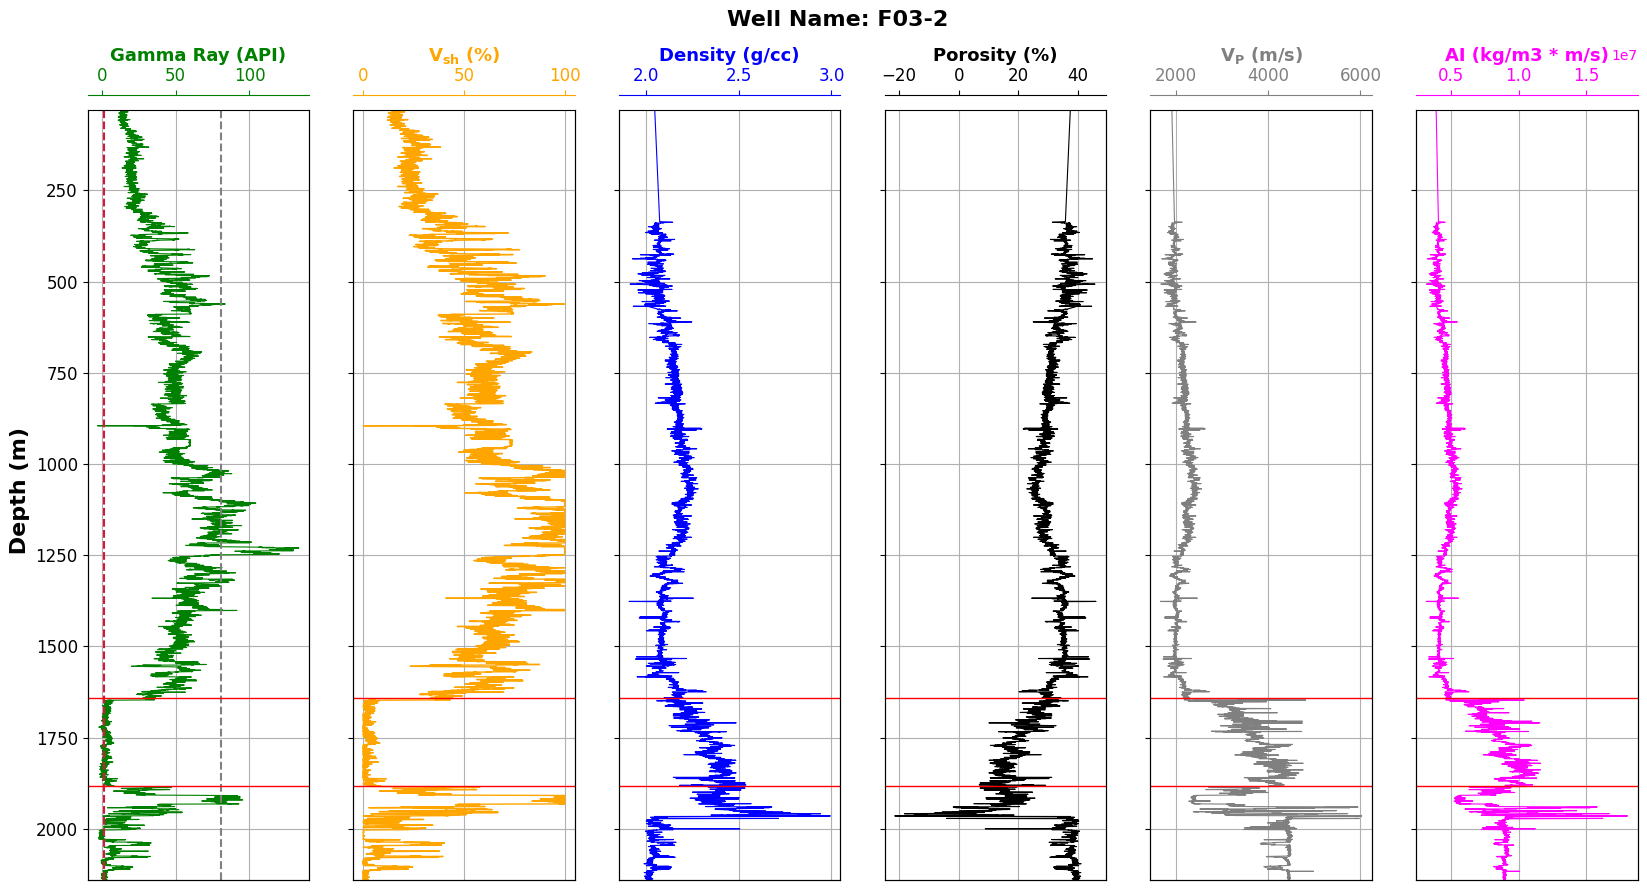

In [ ]:
# volume of shale calculation for raw data
p5_2 = df_2['GR'].quantile(0.05)
p95_2 = df_2['GR'].quantile(0.95)
I_GR_2 = np.array((df_2["GR"] - p5_2) / (p95_2 - p5_2))
V_sh_2 = np.clip(np.array(I_GR_2), 0, 1)

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F03-2", fontsize = 16, fontweight = 'bold')

# gamma ray log
ax[0].plot(df_2.GR, df_2.DEPTH, color = 'green', linewidth = 0.8)
ax[0].axvline(p5_2, color = "crimson", linestyle = '--')
ax[0].axvline(p95_2, color = "gray", linestyle = '--')
# ax[0].set_xlim(0, 150)
# ax[0].set_xticks([0, 150])
ax[0].set_xlabel('Gamma Ray (API)', color = 'green', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'green')
ax[0].spines.top.set_edgecolor('green')

# volume of shale log
ax[1].plot(V_sh_2 * 100, df_2.DEPTH, color = "orange", linewidth = 1)
ax[1].set_xlabel('$\mathbf{V_{sh}}$ (%)', color = "orange", weight = 'bold', size = 13)
# ax[1].set_xlim(0, 100)
# ax[1].set_xticks([0, 100])
ax[1].tick_params(axis = 'x', colors = "orange")
ax[1].spines.top.set_edgecolor("orange")

# density log
ax[2].plot(df_2.RHOB * 10 ** (-3), df_2.DEPTH, color = 'blue', linewidth = 0.8)
# ax[2].set_xlim(1.95, 3)
# ax[2].set_xticks([1.95, 2.5, 2.95])
ax[2].set_xlabel('Density (g/cc)', color = 'blue', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'blue')
ax[2].spines.top.set_edgecolor('blue')

# porosity log
ax[3].plot(df_2.PHIE * 100, df_2.DEPTH, color = "black", linewidth = 0.8)
# ax[3].set_xlim(-25, 50)
# ax[3].set_xticks([0, 100])
ax[3].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = "black")
ax[3].spines.top.set_edgecolor("black")

# sonic log
ax[4].plot(10 ** 6 / df_2.DT, df_2.DEPTH, color = 'grey', linewidth = 0.8)
# ax[4].set_xlim(1500, 6000)
# ax[4].set_xticks([1500, 4000, 6000])
ax[4].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'grey')
ax[4].spines.top.set_edgecolor('grey')

# AI log
ax[5].plot(df_2.AI, df_2.DEPTH, color = 'magenta', linewidth = 0.8)
# ax[5].set_xlim(1500, 4000)
# ax[5].set_xticks([1500, 4000, 6000])
ax[5].set_xlabel("AI (kg/m3 * m/s)", color = 'magenta', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'magenta')
ax[5].spines.top.set_edgecolor('magenta')

# zonation
for axis in ax:
  axis.axhline(y = 1642, color = "red", linewidth = 1)
  axis.axhline(y = 1882, color = "red", linewidth = 1)
  # axis.fill_betweeny(df_1.DEPTH, 1642, 1882, facecolor = 'red', alpha = 0.3)

# format the axes
for axis in ax:
  axis.set_ylim(df_2.DEPTH.max(), df_2.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

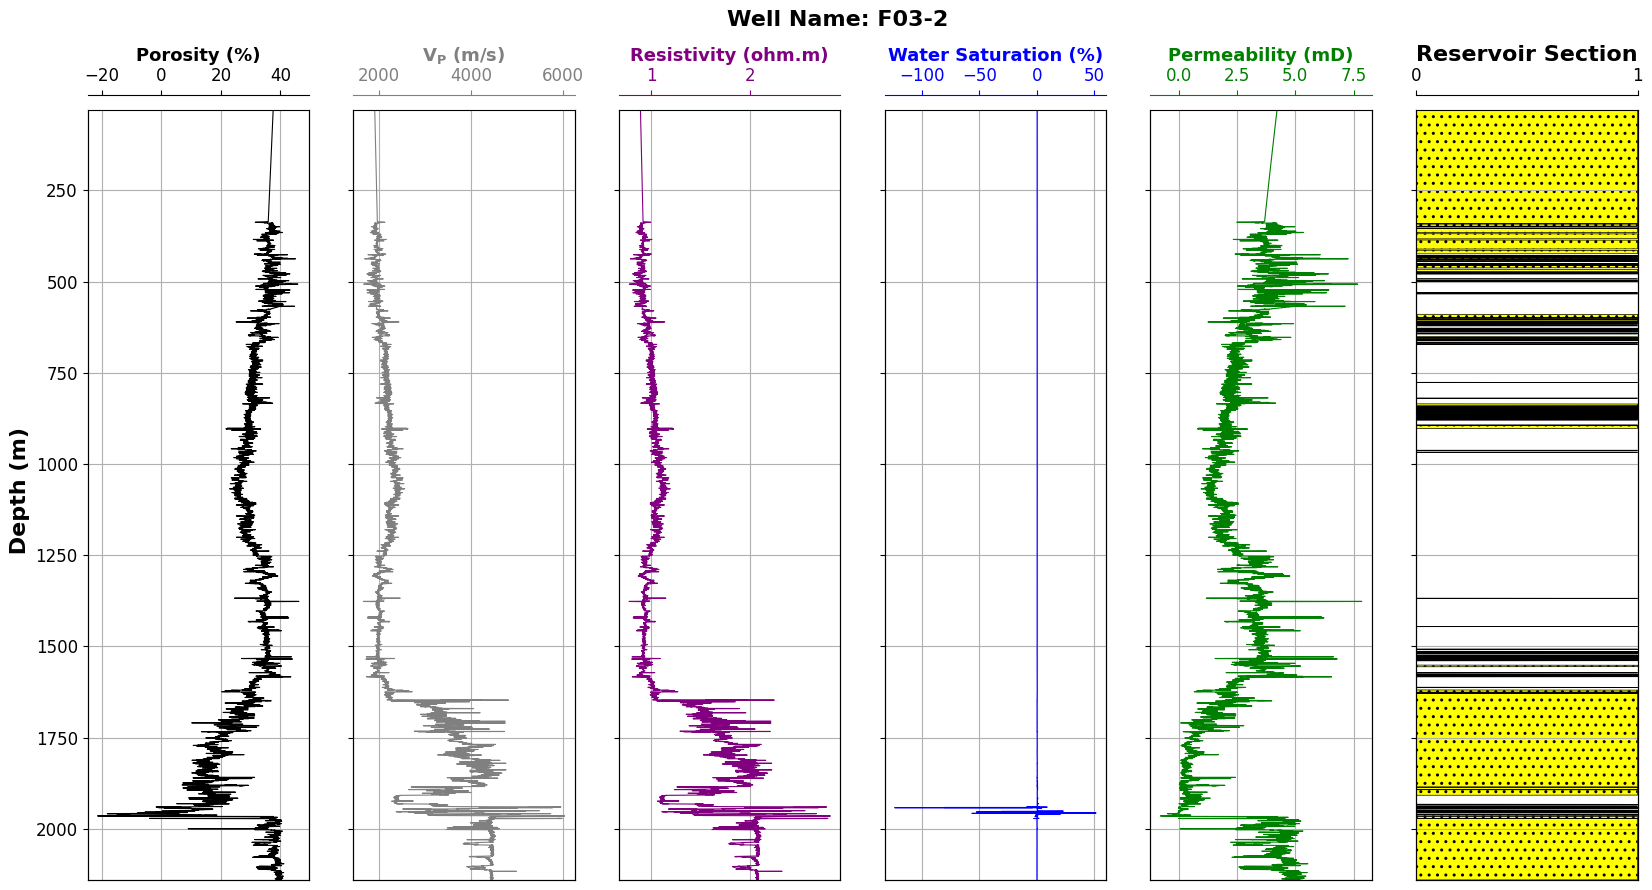

In [ ]:
# resistivity log generation using faust equation
RES_2 = (1 / (0.3048 * df_2.DEPTH.max())) * (0.3048 * 10 ** 6 / (df_2.DT))

# water saturation calculation
s_w_2 = 0.01 * 0.1 / ((df_2.PHIE) * (RES_2))

# permeability calculation
k_2 = 79 * df_2.PHIE ** 3 / ((1 - s_w_2) ** 2)

# reservoir section identification
pay_flag = np.zeros(len(df_2.DEPTH))
for i in range(len(pay_flag)):
  if (V_sh_2[i] <= 0.5) and (df_2.PHIE[i] >= 0.05) and (s_w_2[i] <= 0.5):
    pay_flag[i] = 1
  else:
    pay_flag[i] = 0

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F03-2", fontsize = 16, fontweight = 'bold')

# porosity log
ax[0].plot(df_2.PHIE * 100, df_2.DEPTH, color = "black", linewidth = 0.8)
# ax[0].set_xlim(-25, 50)
# ax[0].set_xticks([0, 100])
ax[0].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = "black")
ax[0].spines.top.set_edgecolor("black")

# sonic log
ax[1].plot(10 ** 6 / df_2.DT, df_2.DEPTH, color = 'grey', linewidth = 0.8)
# ax[1].set_xlim(1500, 4000)
# ax[1].set_xticks([1500, 4000, 6000])
ax[1].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'grey')
ax[1].spines.top.set_edgecolor('grey')

# resistivity Log
ax[2].plot(RES_2, df_2.DEPTH, color = 'purple', linewidth = 0.8, label = 'RESS')
# ax[2].set_xlim(1, 1e4)
# ax[2].set_xticks([1, 1e4])
ax[2].set_xlabel('Resistivity (ohm.m)', color = 'purple', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'purple')
ax[2].spines.top.set_edgecolor('purple')

# water saturation log
ax[3].plot(s_w_2 * 100, df_2.DEPTH, color = 'blue', linewidth = 0.8, label = 'RESS')
# ax[3].set_xlim(0, 100)
# ax[3].set_xticks([1, 1e4])
ax[3].set_xlabel('Water Saturation (%)', color = 'blue', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'blue')
ax[3].spines.top.set_edgecolor('blue')

# permeability log
ax[4].plot(k_2, df_2.DEPTH, color = 'green', linewidth = 0.8, label = 'RESS')
# ax[4].set_xlim(1, 1e4)
# ax[4].set_xticks([1, 1e4])
ax[4].set_xlabel('Permeability (mD)', color = 'green', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'green')
ax[4].spines.top.set_edgecolor('green')

# reservoir section
ax[5].plot(pay_flag, df_2.DEPTH, color = 'black', linewidth = 0.5)
ax[5].fill_betweenx(df_2.DEPTH, 0, pay_flag, facecolor='#ffff00', hatch='..')
ax[5].set_xlabel('Reservoir Section', color = 'black', fontweight = 'bold', fontsize = 16)
ax[5].set_xlim([0, 1])
ax[5].set_xticks([0, 1])
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_2.DEPTH.max(), df_2.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

# Well Name: F03-4

In [ ]:
las_3 = lasio.read("F03-4_logs.las")

In [ ]:
las_3.well

[HeaderItem(mnemonic="STRT", unit="M", value="30.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="1900.0", descr="END DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
 HeaderItem(mnemonic="WELL", unit="", value="F03-4", descr="WELL NAME"),
 HeaderItem(mnemonic="EKB", unit="M", value="30.0", descr="KELLY BUSHING ELEVAT"),
 HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
 HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
 HeaderItem(mnemonic="LOC", unit="", value="X = 623256.0000 Y = 6082586.0000", "),
 HeaderItem(mnemonic="PROV:1", unit="", value="", descr=""),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr=""),
 HeaderItem(mnemonic="PROV:2", unit="", value="", des

In [ ]:
las_3.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="1     DEPTH", original_mnemonic="DEPTH", data.shape=(12467,)),
 CurveItem(mnemonic="RHOB", unit="kg/m3", value="", descr="2     Density", original_mnemonic="RHOB", data.shape=(12467,)),
 CurveItem(mnemonic="DT", unit="us/m", value="", descr="3     Sonic", original_mnemonic="DT", data.shape=(12467,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="4     Gamma Ray", original_mnemonic="GR", data.shape=(12467,)),
 CurveItem(mnemonic="AI", unit="m/s)*(kg/m3", value="", descr="5     P-Impedance", original_mnemonic="AI", data.shape=(12467,)),
 CurveItem(mnemonic="AI_REL", unit="m/s)*(kg/m3", value="", descr="6     P-Impedance_rel", original_mnemonic="AI_REL", data.shape=(12467,)),
 CurveItem(mnemonic="PHIE", unit="fraction", value="", descr="7     Porosity", original_mnemonic="PHIE", data.shape=(12467,))]

In [ ]:
df_3 = las_3.df() # converting to dataframe

In [ ]:
df_3.isna().sum() # check the number of nan values

RHOB      270
DT        270
GR         74
AI        270
AI_REL    270
PHIE      270
dtype: int64

In [ ]:
df_3.reset_index(inplace=True)
df_3.rename(columns={'DEPTH':'DEPTH'},inplace=True)

In [ ]:
df_3

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,30.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,30.1500,2077.7849,508.5176,NaN,4085964.00,-3257.4102,0.3577
2,30.3000,2077.8000,508.5054,NaN,4086092.75,-3257.4102,0.3576
3,30.4500,2077.8000,508.4931,NaN,4086191.00,-3257.4102,0.3576
4,30.6000,2077.8000,508.4809,NaN,4086289.50,-3257.4102,0.3576
...,...,...,...,...,...,...,...
12462,1899.3000,NaN,NaN,8.2197,NaN,NaN,NaN
12463,1899.4501,NaN,NaN,7.3946,NaN,NaN,NaN
12464,1899.6001,NaN,NaN,7.1500,NaN,NaN,NaN
12465,1899.7501,NaN,NaN,7.1500,NaN,NaN,NaN


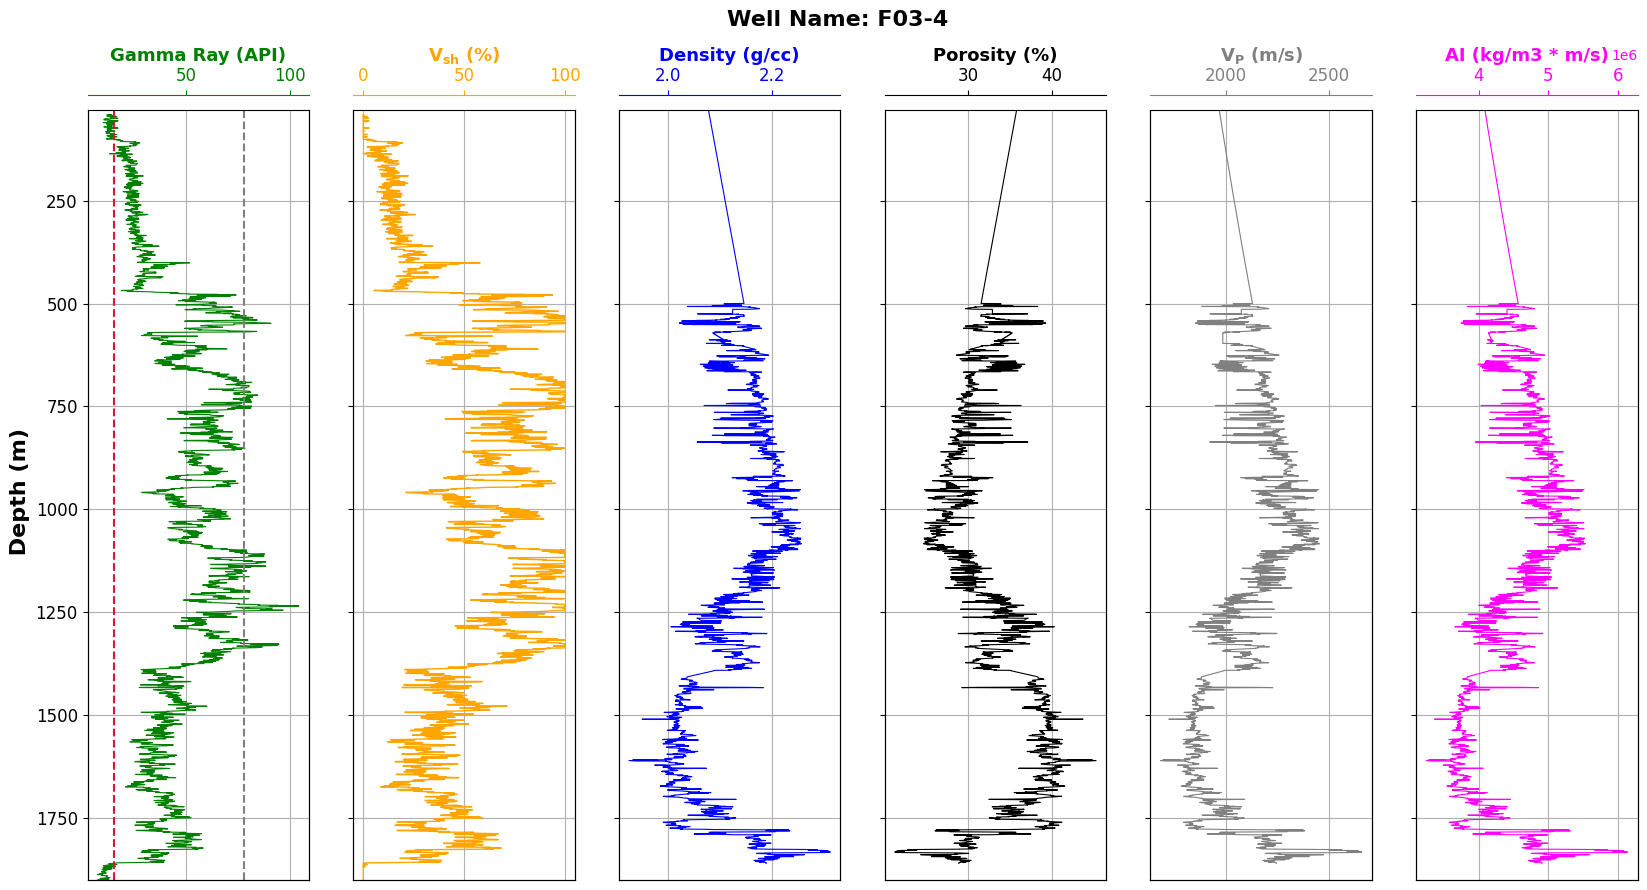

In [ ]:
# volume of shale calculation for raw data
p5_3 = df_3['GR'].quantile(0.05)
p95_3 = df_3['GR'].quantile(0.95)
I_GR_3 = np.array((df_3["GR"] - p5_3) / (p95_3 - p5_3))
V_sh_3 = np.clip(np.array(I_GR_3), 0, 1)

# resistivity log generation using faust equation
RES_3 = (1 / (0.3048 * df_3.DEPTH.max())) * (0.3048 * 10 ** 6 / (df_3.DT))

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F03-4", fontsize = 16, fontweight = 'bold')

# gamma ray log
ax[0].plot(df_3.GR, df_3.DEPTH, color = 'green', linewidth = 0.8)
ax[0].axvline(p5_3, color = "crimson", linestyle = '--')
ax[0].axvline(p95_3, color = "gray", linestyle = '--')
# ax[0].set_xlim(0, 150)
# ax[0].set_xticks([0, 150])
ax[0].set_xlabel('Gamma Ray (API)', color = 'green', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'green')
ax[0].spines.top.set_edgecolor('green')

# volume of shale log
ax[1].plot(V_sh_3 * 100, df_3.DEPTH, color = "orange", linewidth = 1)
ax[1].set_xlabel('$\mathbf{V_{sh}}$ (%)', color = "orange", weight = 'bold', size = 13)
# ax[1].set_xlim(0, 100)
# ax[1].set_xticks([0, 100])
ax[1].tick_params(axis = 'x', colors = "orange")
ax[1].spines.top.set_edgecolor("orange")

# density log
ax[2].plot(df_3.RHOB * 10 ** (-3), df_3.DEPTH, color = 'blue', linewidth = 0.8)
# ax[2].set_xlim(1.95, 3)
# ax[2].set_xticks([1.95, 2.5, 2.95])
ax[2].set_xlabel('Density (g/cc)', color = 'blue', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'blue')
ax[2].spines.top.set_edgecolor('blue')

# porosity log
ax[3].plot(df_3.PHIE * 100, df_3.DEPTH, color = "black", linewidth = 0.8)
# ax[3].set_xlim(-25, 50)
# ax[3].set_xticks([0, 100])
ax[3].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = "black")
ax[3].spines.top.set_edgecolor("black")

# sonic log
ax[4].plot(10 ** 6 / df_3.DT, df_3.DEPTH, color = 'grey', linewidth = 0.8)
# ax[4].set_xlim(1500, 4000)
# ax[4].set_xticks([1500, 4000, 6000])
ax[4].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'grey')
ax[4].spines.top.set_edgecolor('grey')

# AI log
ax[5].plot(df_3.AI, df_3.DEPTH, color = 'magenta', linewidth = 0.8)
# ax[5].set_xlim(1500, 4000)
# ax[5].set_xticks([1500, 4000, 6000])
ax[5].set_xlabel("AI (kg/m3 * m/s)", color = 'magenta', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'magenta')
ax[5].spines.top.set_edgecolor('magenta')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_3.DEPTH.max(), df_3.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

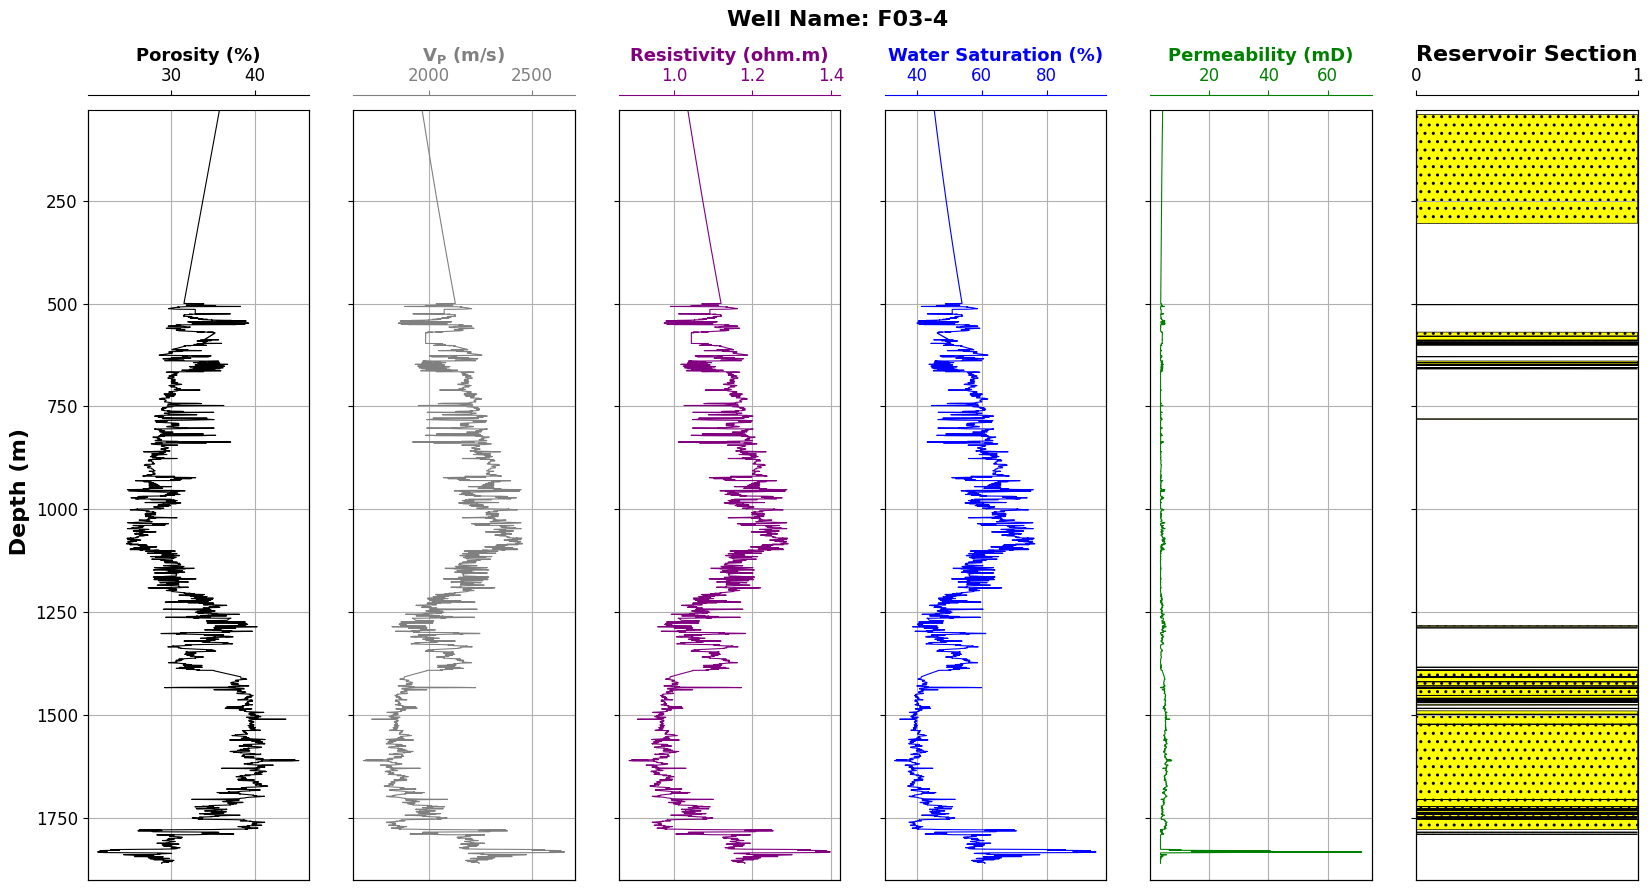

In [ ]:
# resistivity log generation using faust equation
RES_3 = (1 / (0.3048 * df_3.DEPTH.max())) * (0.3048 * 10 ** 6 / (df_3.DT))

# water saturation calculation
s_w_3 = 0.3 * 0.2 / ((df_3.PHIE ** 2) * (RES_3))

# permeability calculation
k_3 = 79 * df_3.PHIE ** 4 / ((1 - s_w_3) ** 2)

# reservoir section identification
pay_flag = np.zeros(len(df_3.DEPTH))
for i in range(len(pay_flag)):
  if (V_sh_3[i] <= 0.5) and (df_3.PHIE[i] >= 0.05) and (s_w_3[i] <= 0.5):
    pay_flag[i] = 1
  else:
    pay_flag[i] = 0

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F03-4", fontsize = 16, fontweight = 'bold')

# porosity log
ax[0].plot(df_3.PHIE * 100, df_3.DEPTH, color = "black", linewidth = 0.8)
# ax[0].set_xlim(-25, 50)
# ax[0].set_xticks([0, 100])
ax[0].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = "black")
ax[0].spines.top.set_edgecolor("black")

# sonic log
ax[1].plot(10 ** 6 / df_3.DT, df_3.DEPTH, color = 'grey', linewidth = 0.8)
# ax[1].set_xlim(1500, 4000)
# ax[1].set_xticks([1500, 4000, 6000])
ax[1].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'grey')
ax[1].spines.top.set_edgecolor('grey')

# resistivity Log
ax[2].plot(RES_3, df_3.DEPTH, color = 'purple', linewidth = 0.8, label = 'RESS')
# ax[2].set_xlim(1, 1e4)
# ax[2].set_xticks([1, 1e4])
ax[2].set_xlabel('Resistivity (ohm.m)', color = 'purple', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'purple')
ax[2].spines.top.set_edgecolor('purple')

# water saturation log
ax[3].plot(s_w_3 * 100, df_3.DEPTH, color = 'blue', linewidth = 0.8, label = 'RESS')
# ax[3].set_xlim(1, 1e4)
# ax[3].set_xticks([1, 1e4])
ax[3].set_xlabel('Water Saturation (%)', color = 'blue', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'blue')
ax[3].spines.top.set_edgecolor('blue')

# permeability log
ax[4].plot(k_3, df_3.DEPTH, color = 'green', linewidth = 0.8, label = 'RESS')
# ax[4].set_xlim(1, 1e4)
# ax[4].set_xticks([1, 1e4])
ax[4].set_xlabel('Permeability (mD)', color = 'green', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'green')
ax[4].spines.top.set_edgecolor('green')

# reservoir section
ax[5].plot(pay_flag, df_3.DEPTH, color = 'black', linewidth = 0.5)
ax[5].fill_betweenx(df_3.DEPTH, 0, pay_flag, facecolor='#ffff00', hatch='..')
ax[5].set_xlabel('Reservoir Section', color = 'black', fontweight = 'bold', fontsize = 16)
ax[5].set_xlim([0, 1])
ax[5].set_xticks([0, 1])
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_3.DEPTH.max(), df_3.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

# Well Name: F06-1

In [ ]:
las_4 = lasio.read("F06-1_logs.las")

In [ ]:
las_4.well

[HeaderItem(mnemonic="STRT", unit="M", value="28.64", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="1700.0", descr="END DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
 HeaderItem(mnemonic="WELL", unit="", value="F06-1", descr="WELL NAME"),
 HeaderItem(mnemonic="EKB", unit="M", value="28.64", descr="KELLY BUSHING ELEVA"),
 HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
 HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
 HeaderItem(mnemonic="LOC", unit="", value="X = 607903.0000 Y = 6077213.0000", "),
 HeaderItem(mnemonic="PROV:1", unit="", value="", descr=""),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr=""),
 HeaderItem(mnemonic="PROV:2", unit="", value="", de

In [ ]:
las_4.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="1     DEPTH", original_mnemonic="DEPTH", data.shape=(11143,)),
 CurveItem(mnemonic="RHOB", unit="kg/m3", value="", descr="2     Density", original_mnemonic="RHOB", data.shape=(11143,)),
 CurveItem(mnemonic="DT", unit="us/m", value="", descr="3     Sonic", original_mnemonic="DT", data.shape=(11143,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="4     Gamma Ray", original_mnemonic="GR", data.shape=(11143,)),
 CurveItem(mnemonic="AI", unit="m/s)*(kg/m3", value="", descr="5     P-Impedance", original_mnemonic="AI", data.shape=(11143,)),
 CurveItem(mnemonic="AI_REL", unit="m/s)*(kg/m3", value="", descr="6     P-Impedance_rel", original_mnemonic="AI_REL", data.shape=(11143,)),
 CurveItem(mnemonic="PHIE", unit="fraction", value="", descr="7     Porosity", original_mnemonic="PHIE", data.shape=(11143,))]

In [ ]:
df_4 = las_4.df() # converting to dataframe

In [ ]:
df_4.isna().sum() # check the number of nan values

RHOB        5
DT          5
GR        144
AI          5
AI_REL      5
PHIE        5
dtype: int64

In [ ]:
df_4.reset_index(inplace=True)
df_4.rename(columns={'DEPTH':'DEPTH'},inplace=True)

In [ ]:
df_4

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,28.6400,NaN,NaN,NaN,NaN,NaN,NaN
1,28.7900,NaN,NaN,NaN,NaN,NaN,NaN
2,28.9400,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0900,NaN,NaN,NaN,NaN,NaN,NaN
4,29.2400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
11138,1699.3401,2253.6553,408.5790,65.3096,5515911.5,-6.817655e+04,0.2477
11139,1699.4901,2258.8062,405.6664,66.8890,5568257.0,-6.817655e+04,0.2445
11140,1699.6400,2262.7539,403.4365,68.4500,5608718.0,-6.817655e+04,0.2420
11141,1699.7900,2264.4343,402.4676,68.9515,5626381.0,2.700981e+06,0.2410


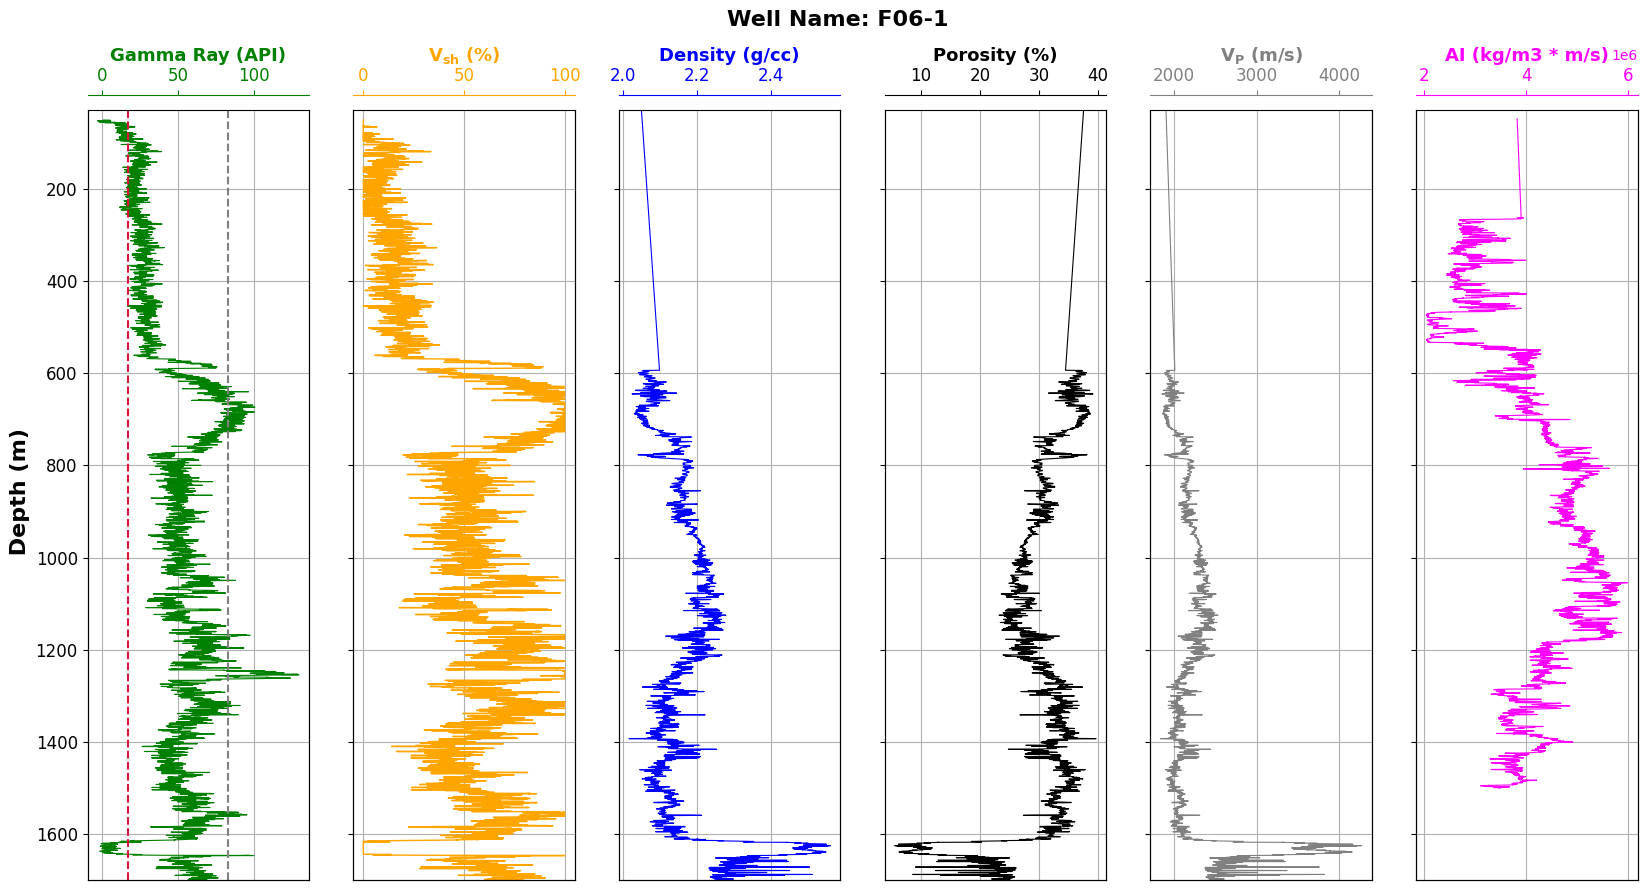

In [ ]:
# volume of shale calculation for raw data
p5_4 = df_4['GR'].quantile(0.05)
p95_4 = df_4['GR'].quantile(0.95)
I_GR_4 = np.array((df_4["GR"] - p5_4) / (p95_4 - p5_4))
V_sh_4 = np.clip(np.array(I_GR_4), 0, 1)

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F06-1", fontsize = 16, fontweight = 'bold')

# gamma ray log
ax[0].plot(df_4.GR, df_4.DEPTH, color = 'green', linewidth = 0.8)
ax[0].axvline(p5_4, color = "crimson", linestyle = '--')
ax[0].axvline(p95_4, color = "gray", linestyle = '--')
# ax[0].set_xlim(0, 150)
# ax[0].set_xticks([0, 150])
ax[0].set_xlabel('Gamma Ray (API)', color = 'green', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'green')
ax[0].spines.top.set_edgecolor('green')

# volume of shale log
ax[1].plot(V_sh_4 * 100, df_4.DEPTH, color = "orange", linewidth = 1)
ax[1].set_xlabel('$\mathbf{V_{sh}}$ (%)', color = "orange", weight = 'bold', size = 13)
# ax[1].set_xlim(0, 100)
# ax[1].set_xticks([0, 100])
ax[1].tick_params(axis = 'x', colors = "orange")
ax[1].spines.top.set_edgecolor("orange")

# density log
ax[2].plot(df_4.RHOB * 10 ** (-3), df_4.DEPTH, color = 'blue', linewidth = 0.8)
# ax[2].set_xlim(1.95, 3)
# ax[2].set_xticks([1.95, 2.5, 2.95])
ax[2].set_xlabel('Density (g/cc)', color = 'blue', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'blue')
ax[2].spines.top.set_edgecolor('blue')

# porosity log
ax[3].plot(df_4.PHIE * 100, df_4.DEPTH, color = "black", linewidth = 0.8)
# ax[3].set_xlim(-25, 50)
# ax[3].set_xticks([0, 100])
ax[3].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = "black")
ax[3].spines.top.set_edgecolor("black")

# sonic log
ax[4].plot(10 ** 6 / df_4.DT, df_4.DEPTH, color = 'grey', linewidth = 0.8)
# ax[4].set_xlim(1500, 4000)
# ax[4].set_xticks([1500, 4000, 6000])
ax[4].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'grey')
ax[4].spines.top.set_edgecolor('grey')

# AI log
ax[5].plot(df_1.AI, df_1.DEPTH, color = 'magenta', linewidth = 0.8)
# ax[5].set_xlim(1500, 4000)
# ax[5].set_xticks([1500, 4000, 6000])
ax[5].set_xlabel("AI (kg/m3 * m/s)", color = 'magenta', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'magenta')
ax[5].spines.top.set_edgecolor('magenta')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_4.DEPTH.max(), df_4.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

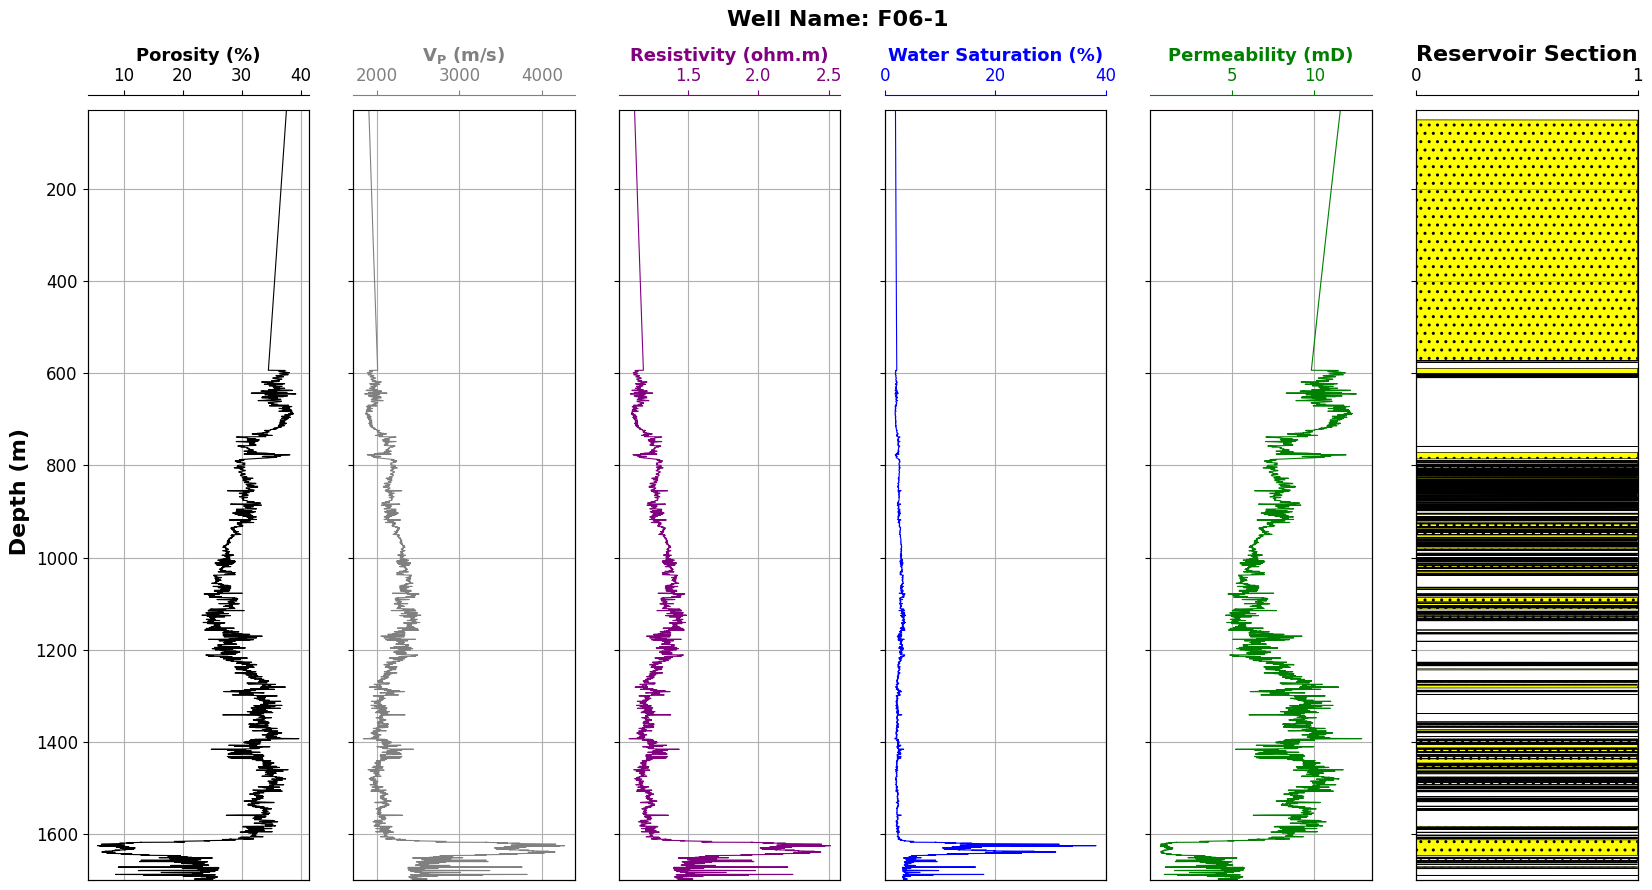

In [ ]:
# resistivity log generation using faust equation
RES_4 = (1 / (0.3048 * df_4.DEPTH.max())) * (0.3048 * 10 ** 6 / (df_4.DT))

# water saturation calculation
s_w_4 = 0.03 * 0.1 / ((df_4.PHIE ** 2) * (RES_4))

# permeability calculation
k_4 = 79 * df_4.PHIE ** 2 / ((1 - s_w_4) ** 2)

# reservoir section identification
pay_flag = np.zeros(len(df_4.DEPTH))
for i in range(len(pay_flag)):
  if (V_sh_4[i] <= 0.5) and (df_4.PHIE[i] >= 0.05) and (s_w_4[i] <= 0.5):
    pay_flag[i] = 1
  else:
    pay_flag[i] = 0

# define figure
fig, ax = plt.subplots(1, 6, figsize = (20, 10))
fig.suptitle("Well Name: F06-1", fontsize = 16, fontweight = 'bold')

# porosity log
ax[0].plot(df_4.PHIE * 100, df_4.DEPTH, color = "black", linewidth = 0.8)
# ax[0].set_xlim(-25, 50)
# ax[0].set_xticks([0, 100])
ax[0].set_xlabel('Porosity (%)', color = "black", weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = "black")
ax[0].spines.top.set_edgecolor("black")

# sonic log
ax[1].plot(10 ** 6 / df_4.DT, df_4.DEPTH, color = 'grey', linewidth = 0.8)
# ax[1].set_xlim(1500, 4000)
# ax[1].set_xticks([1500, 4000, 6000])
ax[1].set_xlabel("$\mathbf{V_{P}}$ (m/s)", color = 'grey', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'grey')
ax[1].spines.top.set_edgecolor('grey')

# resistivity Log
ax[2].plot(RES_4, df_4.DEPTH, color = 'purple', linewidth = 0.8, label = 'RESS')
# ax[2].set_xlim(1, 1e4)
# ax[2].set_xticks([1, 1e4])
ax[2].set_xlabel('Resistivity (ohm.m)', color = 'purple', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'purple')
ax[2].spines.top.set_edgecolor('purple')

# water saturation log
ax[3].plot(s_w_4 * 100, df_4.DEPTH, color = 'blue', linewidth = 0.8, label = 'RESS')
# ax[3].set_xlim(1, 1e4)
# ax[3].set_xticks([1, 1e4])
ax[3].set_xlabel('Water Saturation (%)', color = 'blue', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'blue')
ax[3].spines.top.set_edgecolor('blue')

# permeability log
ax[4].plot(k_4, df_4.DEPTH, color = 'green', linewidth = 0.8, label = 'RESS')
# ax[4].set_xlim(1, 1e4)
# ax[4].set_xticks([1, 1e4])
ax[4].set_xlabel('Permeability (mD)', color = 'green', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'green')
ax[4].spines.top.set_edgecolor('green')

# reservoir section
ax[5].plot(pay_flag, df_4.DEPTH, color = 'black', linewidth = 0.5)
ax[5].fill_betweenx(df_4.DEPTH, 0, pay_flag, facecolor='#ffff00', hatch='..')
ax[5].set_xlabel('Reservoir Section', color = 'black', fontweight = 'bold', fontsize = 16)
ax[5].set_xlim([0, 1])
ax[5].set_xticks([0, 1])
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# zonation
# for axis in ax:
  # axis.axhline(y = 1642, color = "red", linewidth = 1)
  # axis.axhline(y = 1882, color = "red", linewidth = 1)

# format the axes
for axis in ax:
  axis.set_ylim(df_4.DEPTH.max(), df_4.DEPTH.min())
  axis.grid()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()